# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mi=pd.read_csv(r"E:\drive c\Python\insurance_data.csv")

# Data Cleaning

In [3]:
mi.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24,male,30.1,87,No,0,No,southeast,1131.51
2,3,27,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,37,male,33.7,80,No,0,No,northwest,1136.40
4,5,30,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
mi.isnull().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [5]:
mi.columns

Index(['PatientID', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic',
       'children', 'smoker', 'region', 'claim'],
      dtype='object')

In [6]:
mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1340 non-null   int64  
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1340 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 104.8+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [8]:
mi[mi.select_dtypes(include=['object']).columns]=mi[mi.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [9]:
mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1340 non-null   int64  
 2   gender         1340 non-null   int32  
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   int32  
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   int32  
 8   region         1340 non-null   int32  
 9   claim          1340 non-null   float64
dtypes: float64(2), int32(4), int64(4)
memory usage: 83.9 KB


In [10]:
mi.describe()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.063433,0.505970,30.668955,94.157463,0.479104,1.093284,0.204478,1.631343,13252.745642
std,386.968991,11.093991,0.500151,6.106735,11.434712,0.499750,1.205334,0.403470,1.025399,12109.609288
min,1.000000,18.000000,0.000000,16.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1121.870000
25%,335.750000,29.000000,0.000000,26.275000,86.000000,0.000000,0.000000,0.000000,1.000000,4719.685000
50%,670.500000,37.500000,1.000000,30.400000,92.000000,0.000000,1.000000,0.000000,2.000000,9369.615000
75%,1005.250000,47.000000,1.000000,34.700000,99.000000,1.000000,2.000000,0.000000,2.000000,16604.305000
max,1340.000000,60.000000,1.000000,53.100000,140.000000,1.000000,5.000000,1.000000,3.000000,63770.430000


In [11]:
mi.shape

(1340, 10)

# Data Visualization:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


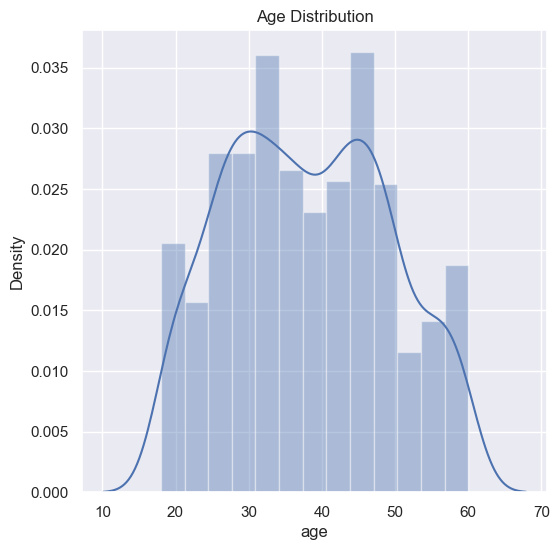

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(mi['age'])
plt.title('Age Distribution')
plt.show()


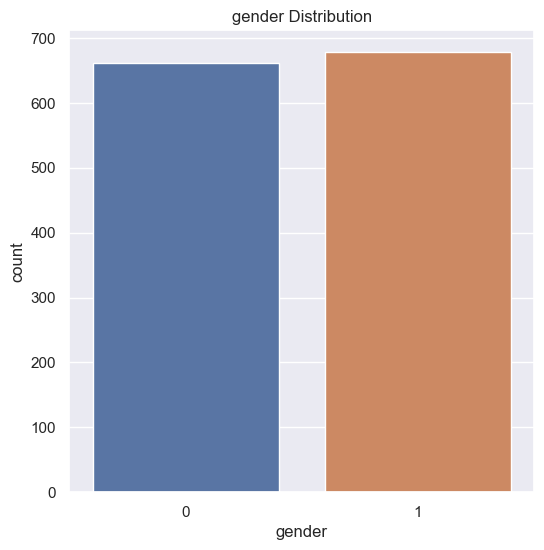

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='gender', data=mi)
plt.title('gender Distribution')
plt.show()

In [14]:
mi['gender'].value_counts()

1    678
0    662
Name: gender, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


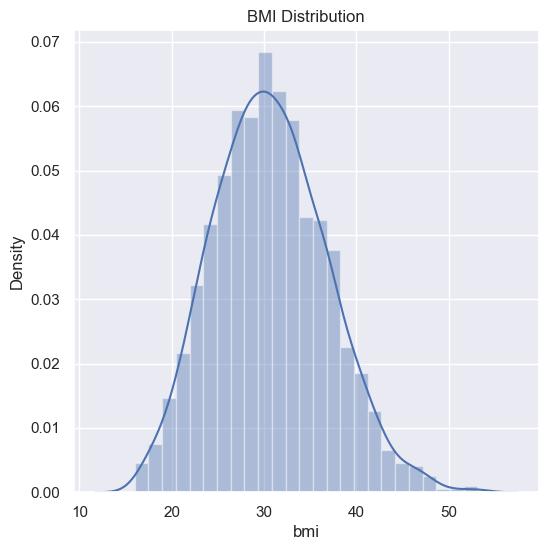

In [15]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(mi['bmi'])
plt.title('BMI Distribution')
plt.show()

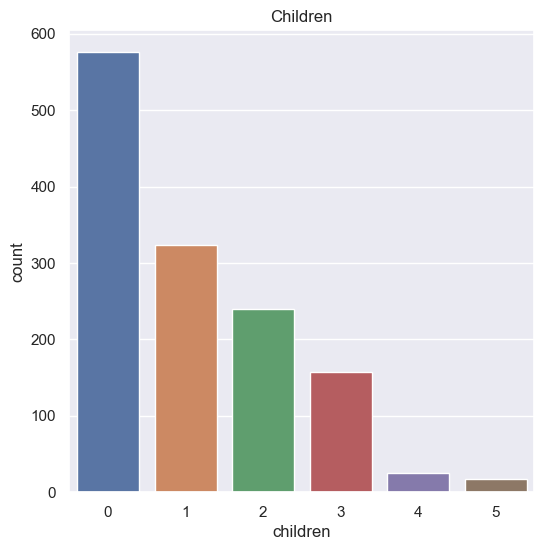

In [16]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=mi)
plt.title('Children')
plt.show()

In [17]:
mi['children'].value_counts()

0    576
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

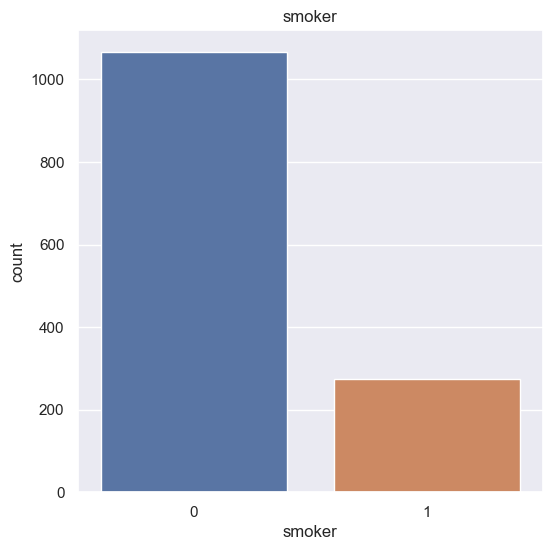

In [18]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=mi)
plt.title('smoker')
plt.show()

In [19]:
mi['smoker'].value_counts()

0    1066
1     274
Name: smoker, dtype: int64

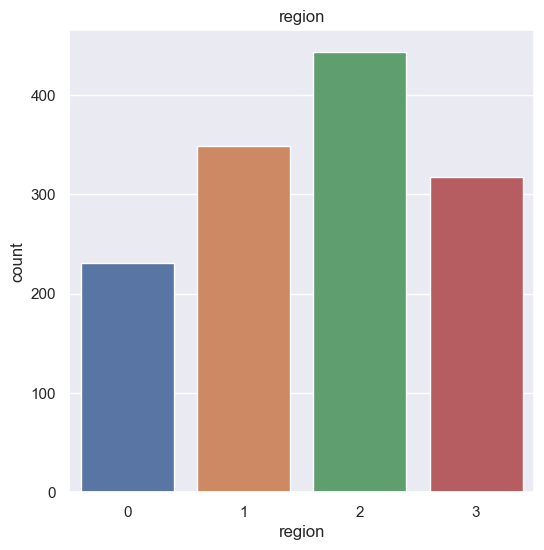

In [20]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=mi)
plt.title('region')
plt.show()

In [21]:
mi['region'].value_counts()

2    443
1    349
3    317
0    231
Name: region, dtype: int64

In [22]:
#encoding gender column
mi.replace({'gender':{'male':0,'female':1}}, inplace=True)

#encoding 'smoker' column
mi.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

#encoding 'region' column
mi.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

# used in machine learning to split a dataset into training and testing sets

In [23]:
from sklearn .model_selection import train_test_split
mi_train,mi_test=train_test_split(mi,test_size=.2)

In [24]:
mi_train_x=mi_train.iloc[:,0:-1]
mi_train_y=mi_train.iloc[:,-1]

mi_test_x=mi_test.iloc[:,0:-1]
mi_test_y=mi_test.iloc[:,-1]


In [80]:
mi_train_x

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region
1254,1255,46,1,44.9,138,1,0,1,0
251,252,30,0,26.6,89,1,0,0,0
33,34,52,0,36.9,81,0,0,0,0
1011,1012,32,0,26.8,109,0,1,1,0
286,287,30,1,27.6,90,0,1,0,0
...,...,...,...,...,...,...,...,...,...
128,129,31,1,31.7,90,0,0,0,3
189,190,37,0,23.4,96,0,2,0,1
900,901,40,1,38.4,82,0,0,0,3
906,907,46,0,32.4,108,0,1,0,2


In [25]:
mi_train_y

1338    62592.87
40       1634.57
411      5693.43
228      3443.06
132      2304.00
          ...   
1148    26109.33
306      4435.09
921     13390.56
657      9182.17
788     11253.42
Name: claim, Length: 1072, dtype: float64

# Feature Engineering:

In [26]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [27]:
linreg.fit(mi_train_x,mi_train_y)

LinearRegression()

In [28]:
pred=linreg.predict(mi_train_x)

In [29]:
rsquare=linreg.score(mi_train_x,mi_train_y)
rsquare

0.8729871565561812

In [30]:
from sklearn .metrics import mean_squared_error

In [45]:
mse_linreg=mean_squared_error(mi_train_y,pred)
mse_linreg

19585808.373924185

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [33]:
dt.fit(mi_train_x,mi_train_y)

DecisionTreeRegressor()

In [34]:
pred_dt = dt.predict(mi_test_x)

In [47]:
rsquare=dt.score(mi_train_x,mi_train_y)
rsquare

1.0

In [44]:
mse_dt=mean_squared_error(mi_test_y,pred_dt)
mse_dt

16831.897117537294

In [36]:
from sklearn .ensemble import RandomForestRegressor
rfc= RandomForestRegressor()

In [37]:
rfc.fit(mi_train_x,mi_train_y)

RandomForestRegressor()

In [38]:
pred_rfc = rfc.predict(mi_test_x)

In [48]:
rsquare=rfc.score(mi_train_x,mi_train_y)
rsquare

0.9999682301899508

In [43]:
mse_rfc=mean_squared_error(mi_test_y,pred_rfc)
mse_rfc

7729.145827754595

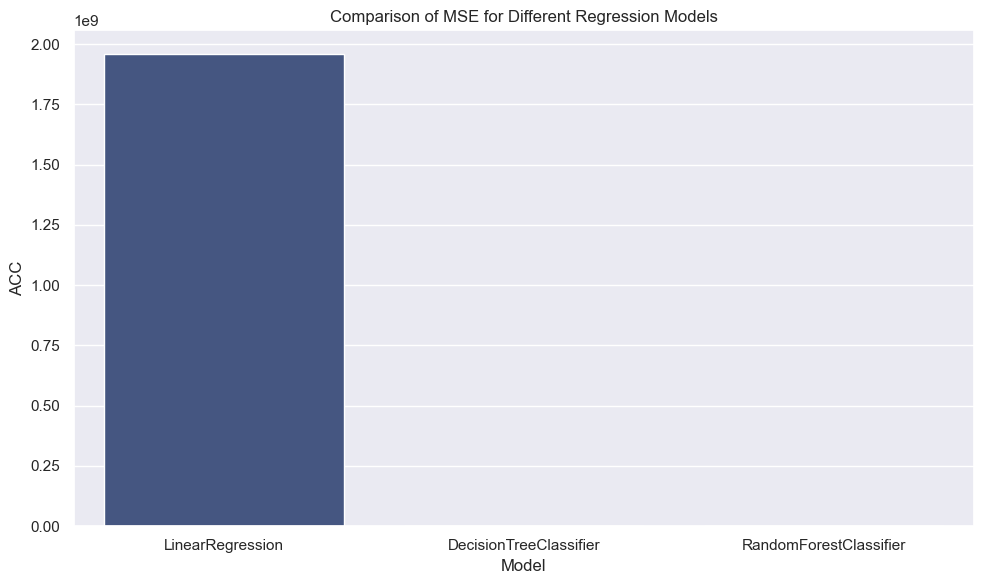

In [42]:
models = ['LinearRegression', 'DecisionTreeClassifier','RandomForestClassifier']
mse_values= [mse_linreg,mse_dt,mse_rfc]
df = pd.DataFrame({'Model': models, 'ACC': mse_values})

# Plot the results using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='ACC', data=df, palette='viridis')
plt.title('Comparison of MSE for Different Regression Models')
plt.tight_layout()
plt.show()

In [ ]:
# Cluclusion --Lower the MSE Better is the model 
# In this Medical insurance Data Random Forest Classifier is performing Best.

In [ ]:
#Adjust premium rates for different policyholders to reflect their risk profiles, ensuring fairness and competitiveness.